In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp, odeint
import scipy.integrate as scint
import scipy
import pylab 
from scipy.optimize import fsolve

In [3]:
def logistic_eq(r,x):
    return r*x*(np.ones_like(x) - x)

In [53]:
# Create the bifurcation diagram
def bifurcation_diagram(seed, n_skip, n_iter, step=0.001, r_min=0, r_max = 2):
    # Array of r values, the x axis of the bifurcation plot
    R = []
    # Array of x_t values, the y axis of the bifurcation plot
    X = []
    # Create the r values to loop. For each r value we will plot n_iter points
    r_range = np.linspace(r_min, r_max, int(1/step))

    for r in r_range:
        x = seed;
        # For each r, iterate the logistic function and collect datapoint if n_skip iterations have occurred
        for i in range(n_iter+n_skip+1):
            if i >= n_skip:
                R.append(r)
                X.append(x)
            x = logistic_eq(r,x);
    # Plot the data    
    return R, X
    

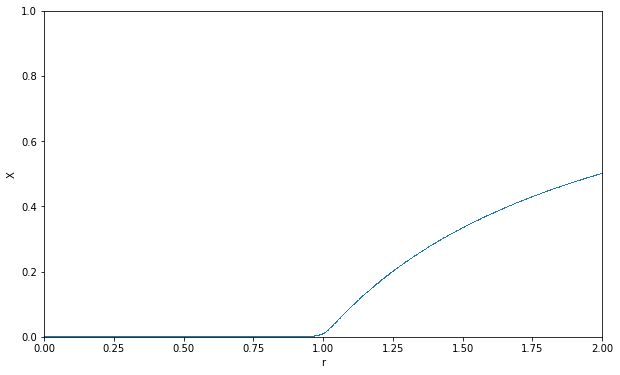

In [6]:
ylim_min = 0
ylim_max = 1
r_min=0
r_max = 2
R, X = bifurcation_diagram(0.1, 100, 5)
plt.figure(figsize=(10,6))
plt.plot(R, X, ls='', marker=',')
plt.ylim(ylim_min, ylim_max)
plt.xlim(r_min, r_max)
plt.xlabel('r')
plt.ylabel('X')
plt.show()

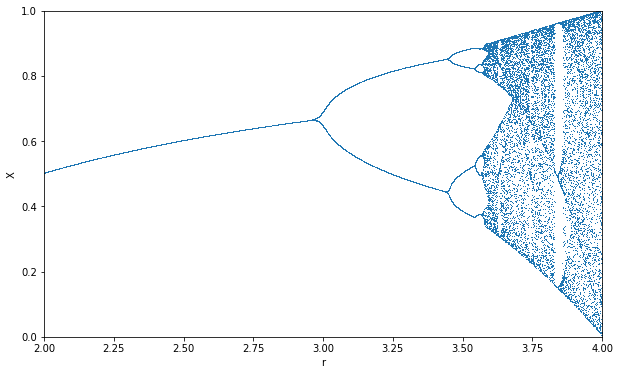

In [54]:
ylim_min = 0
ylim_max = 1
r_min=2
r_max = 4
R, X = bifurcation_diagram(0.2, 100, 5, step=0.0001, r_min=2, r_max = 4)
plt.figure(figsize=(10,6))
plt.plot(R, X, ls='', marker=',')
plt.ylim(ylim_min, ylim_max)
plt.xlim(r_min, r_max)
plt.xlabel('r')
plt.ylabel('X')
plt.show()

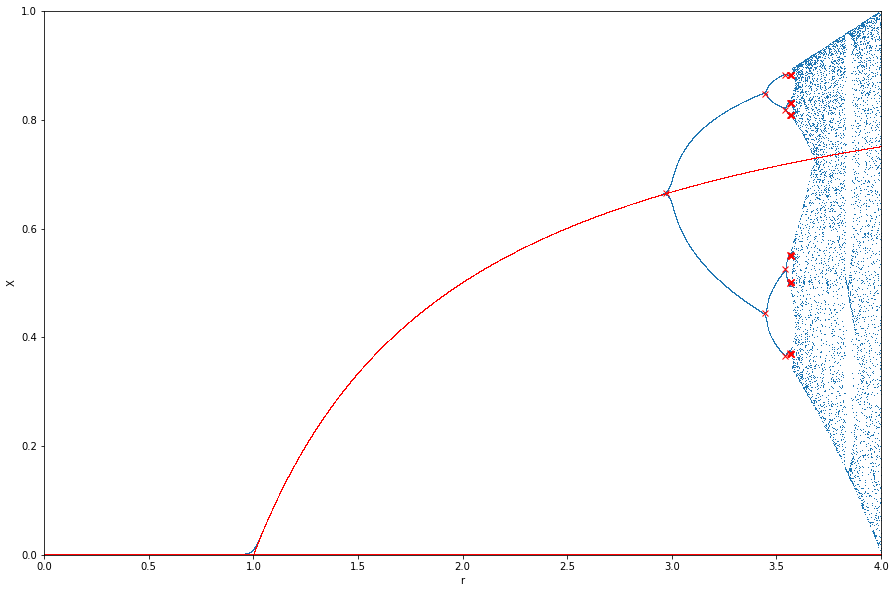

In [15]:
ylim_min = 0
ylim_max = 1
r_min=0
r_max = 4
R, X = bifurcation_diagram(0.2, 100, 5, step=0.0001, r_min=0, r_max = 4)
plt.figure(figsize=(15,10))
plt.plot(R, X, ls='', marker=',')
#plt.plot(sol, ls='', marker=',')
plt.ylim(ylim_min, ylim_max)
plt.xlim(r_min, r_max)
plt.xlabel('r')
plt.ylabel('X')

steady_states = []
count = 0   # counter to access X elements
means= False # set to true once an approximate value for the limit cycle is found
r2, r3 = [], [] # save first approximate value for each limit cycle (each branch)

for r in R:
    if r == 0: # avoid division by zero
        pass
    else:
        plt.plot(r, (r-1)/r, ls='', marker=',', color='red') # plot the steady states
        plt.plot(r, 0, ls='', marker=',',  color='red') # plot the steady states
    if 2.971 <= r <= 2.976: # find first limit cycle (approximate location due to the discretization with the step size)
        if not means:
            plt.plot(r, X[count], ls='', marker='x',  color='red')
            means = True
    if 3.447 <= r <= 3.448:  # find 2nd and 3rd limit cycle (approximate location due to the discretization with the step size)
        if len(r2) == 0:
            r2.append(X[count])
            plt.plot(r, X[count], ls='', marker='x',  color='red')
        elif len(r2) == 1 and abs(r2[0]-X[count]) > 0.1:
            r2.append(X[count])
            plt.plot(r, X[count], ls='', marker='x',  color='red')
        elif len(r2) == 2:
            pass
    if 3.543 <= r <= 3.546:  # find 4th, 5th, 6th, 7th and 8th limit cycle (approximate location due to the discretization with the step size)
        if len(r3) == 0:
            r3.append(X[count])
            plt.plot(r, X[count], ls='', marker='x',  color='red')
        elif len(r3) == 1 and abs(r3[0]-X[count]) > 0.05:
            r3.append(X[count])
            plt.plot(r, X[count], ls='', marker='x',  color='red')
        elif len(r3) == 2 and abs(r3[0]-X[count]) > 0.05 and abs(r3[1]-X[count]) > 0.05:
            r3.append(X[count])
            plt.plot(r, X[count], ls='', marker='x',  color='red')
        elif len(r3) == 3 and abs(r3[0]-X[count]) > 0.05 and abs(r3[1]-X[count]) > 0.05 and abs(r3[2]-X[count]) > 0.05:
            r3.append(X[count])
            plt.plot(r, X[count], ls='', marker='x',  color='red')
        elif len(r3) == 4:
            pass
    if 3.566 <= r <= 3.569: # find the last limit cycles (too small, hence even if too many points found, will not be distinguished on the graph)
        plt.plot(r, X[count], ls='', marker='x',  color='red')

    count += 1


plt.show()

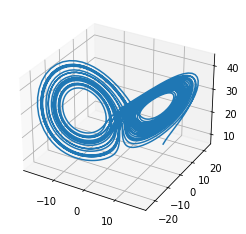

In [55]:
def f(state, t, rho, sigma, beta):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [10, 10, 10]
t = np.arange(0.0, 40.0, 0.01)
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
states1 = odeint(f, state0, t, args=(rho, sigma, beta))
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states1[:, 0], states1[:, 1], states1[:, 2])
plt.draw()
plt.show()

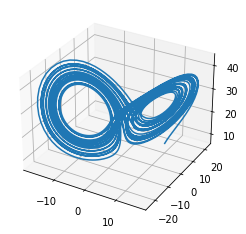

Simulation time units until distance > 1
22.61


In [56]:
t = np.arange(0.0, 40.0, 0.01)
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
states1 = odeint(f, state0, t, args=(rho, sigma, beta))
state0_ = [10+1e-8, 10, 10]
states_ = odeint(f, state0_, t, args=(rho, sigma, beta))
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states_[:, 0], states_[:, 1], states_[:, 2])
plt.draw()
plt.show()

for i in range(states1.shape[0]):
    dist = np.sqrt(abs((states1[i, 0] - states_[i, 0])**2 + (states1[i, 1] - states_[i, 1])**2 + (states1[i, 2] - states_[i, 2])**2))
    if dist > 1:
        print("Simulation time units until distance > 1")
        print(i*0.01)
        break

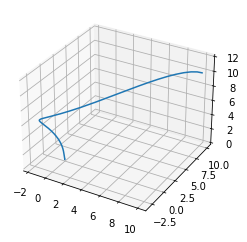

In [57]:
state0 = [10, 10, 10]
t = np.arange(0.0, 40.0, 0.01)
rho = 0.5
sigma = 10.0
beta = 8.0 / 3.0
states = odeint(f, state0, t, args=(rho, sigma, beta))
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

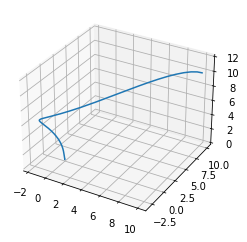

The trajectories did not differ by more than 1


In [58]:
t = np.arange(0.0, 40.0, 0.01)
rho = 0.5
sigma = 10.0
beta = 8.0 / 3.0
states = odeint(f, state0, t, args=(rho, sigma, beta))
state0_ = [10+1e-8, 10, 10]
states_ = odeint(f, state0_, t, args=(rho, sigma, beta))
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states_[:, 0], states_[:, 1], states_[:, 2])
plt.draw()
plt.show()
found = False
for i in range(states.shape[0]):
    dist = np.sqrt(abs((states[i, 0] - states_[i, 0])**2 + (states[i, 1] - states_[i, 1])**2 + (states[i, 2] - states_[i, 2])**2))
    if dist > 1:
        print("Simulation time units until distance > 1")
        print(i*0.01)
        found = True
        break
if not(found):
    print("The trajectories did not differ by more than 1")

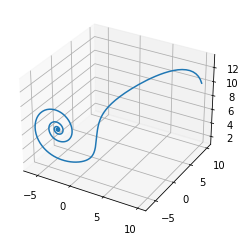

In [59]:
t = np.arange(0.0, 40.0, 0.01)
rho = 7
sigma = 10.0
beta = 8.0 / 3.0
states = odeint(f, state0, t, args=(rho, sigma, beta))
state0_ = [10+1e-8, 10, 10]
states_ = odeint(f, state0_, t, args=(rho, sigma, beta))
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states_[:, 0], states_[:, 1], states_[:, 2])
plt.draw()
plt.show()

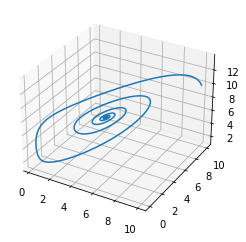

In [60]:
t = np.arange(0.0, 40.0, 0.01)
rho = 8
sigma = 10.0
beta = 8.0 / 3.0
states = odeint(f, state0, t, args=(rho, sigma, beta))
state0_ = [10+1e-8, 10, 10]
states_ = odeint(f, state0_, t, args=(rho, sigma, beta))
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states_[:, 0], states_[:, 1], states_[:, 2])
plt.draw()
plt.show()

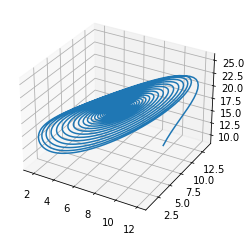

In [61]:
t = np.arange(0.0, 40.0, 0.01)
rho = 19
sigma = 10.0
beta = 8.0 / 3.0
states = odeint(f, state0, t, args=(rho, sigma, beta))
state0_ = [10+1e-8, 10, 10]
states_ = odeint(f, state0_, t, args=(rho, sigma, beta))
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states_[:, 0], states_[:, 1], states_[:, 2])
plt.draw()
plt.show()

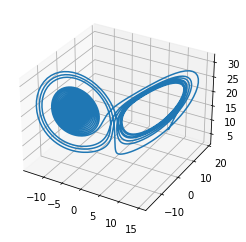

In [62]:
t = np.arange(0.0, 40.0, 0.01)
rho = 20
sigma = 10.0
beta = 8.0 / 3.0
states = odeint(f, state0, t, args=(rho, sigma, beta))
state0_ = [10+1e-8, 10, 10]
states_ = odeint(f, state0_, t, args=(rho, sigma, beta))
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states_[:, 0], states_[:, 1], states_[:, 2])
plt.draw()
plt.show()